#  <center><span style="color:darkred; font-size:3em;">Team AM3  </span>

#  <center><span style="color:darkred; font-size:1.3em;"> Delicious Golden Apple Prices Challenge Regression Model
</span>


<img src="https://producegeek.com/wp-content/uploads/2016/10/golden-delicious-apples-02.jpg" width="300" height="300" align="center"/>

## Overview

This notebook illustrates the process taken to find a model that can predict Average Price per kilogram with relative accuracy. Machine learning models are used to predict the average price per kilogram for Golden Delicious Apples from Explanatory features and aims to help all producing industries to improve their stock and communicate an accurate price to their customers, also to compare if their prices fluctuate by season as the yields from farms fluctuate by season

## Problem identification

### <center> Challenge: EDSA Apple Prices Challange

**Team AM3** was challenged by EDSA(Explore Data Science Academy), with the task of creating a Machine Learning model that is capable of accurately predicting how much a kilogram of Golden Delicious Apple will cost, given certain parameters. Supervised machine learning models, as we'll encounter inside this notebook, refer to models that improve automatically through experience. They are called "supervised", because they depend on some input to be able to produce a prediction.  

#### Background  
In a [research article](https://minnetonkaorchards.com/golden-delicious-apples/) explains,Golden Delicious Apple are pale green to golden yellow in color which were discovered in 1912 in Clay country by Anderson Mullins.They are related to the Grimes Golden but have a sweeter taste. They were discovered by accident on a family farm and rose to be one of the most popular varieties sold today. Furthermore, this variety is the parent of over 30 other popular varieties.

These apples are a favorite for everything from apple pie to apple juice. In the above article you’ll find everything you need to know about Golden Delicious apples, from their fascinating origin to where they grow.

#### Problem statement  
Construct a regression algorithm, capable of accurately predicting how a kilogram of Golden Delicious Apple will cost.

You can find the project overview [here](https://www.kaggle.com/c/edsa-apple-prices-challenge/overview).


## Table of contents  
<a id='toc'></a>
1. [Importing packages](#imp_pac)  


2. [Importing the data](#imp_dat)  
    
    
3. [Data description](#ddescribe)   
     
    
4. [Preprocessing](#the_prep)    
    4.1. Extra feature extraction  
    4.2. Data cleaning
    
    
5. [Exploratory data analysis](#eda)  
    5.1. General analysis  
    5.2. Target variable analysis  
    
    

6. [Splitting the data](#split)  
    6.1. Split into response and predictor  
    6.2. Split data into training and testing sets


7. [Feature extraction](#vect)  
    7.1.  
    7.2.  
    7.3. 


8. [Model training](#train)  
    8.1.  
    8.2. 
    8.3.   
    8.4. 
    8.5.   
    8.6. 


9. [Evaluate model accuracy](#eval)  
    9.1. Make predictions  
    9.2. Confusion matrices and ROC curves  
    9.3. Classification reports


10. [Saving important data](#save)  
    10.1. Save the models  
    10.2. Save the optimal parameters  
    10.3. Save the graphs  
    10.4. Log parameters to experiment


11. [Produce output](#out) 


12. [Conclusion](#conclude)


## 1. Importing packages 
<a id='imp_pac'></a>
[Back to table of contents](#toc)

In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## 2. Importing the data
<a id='imp_dat'></a>
[Back to table of contents](#toc)

In [2]:
# Import training dataset
df_train=pd.read_csv(r"C:\Users\Pontso\OneDrive\Documents\GitHub\Regression_AM3_DSFT\utils\data\train_data.csv")
# Import testing dataset
df_test=pd.read_csv(r"C:\Users\Pontso\Downloads\Advanced_regression_predict-Starter-Data-2629\df-test_set.csv")

## 3. Data description
<a id='ddescribe'></a>
[Back to table of contents](#toc)

This dataset consists of over 60 000 sales made by Durban Fresh Produce Market. For this Predict, you will need to use this data to predict the average price per kilogram of Golden Delicious Apples. The train dataset consists of 13 columns. A description of each variable in the dataset is given below.  


### Training set
**Variable definitions:**  

- **Province** - Different Provinces where the given commodities were produced .
- **Container** -an object used for holding or transporting Golden Delicious Apple.      
- **Size_Grade** - These are the overall dimensions of how big the apples are.  
- **Weight_Kg** -the quantity of apples contained .  
- **Commodities** -Different types of agricultural products that can be bought and sold .  
- **Date** - the day of the month or year of when the commodities were produced.  
- **Low_Price** -It is a price where different commodities they don't cost a lot of money.  
- **High_Price** - It is a price where different commodities were expensive.  
- **Sales_Total** - total number of reduced prices made for commodities.  
- **Total_Qty_Sold** -Total number of commodities sold .  
- **Total_Kg_Sold** - total weight of commodities sold.  
- **Stock_On_Hand** -is the total amount of any given commodity.  
- **avg_price_per_kg** -is the sum of all prices in the commodities divided by the number of commodities per kilogram. 

### Testing set  
During testing we do not have access to other **Commodities** variable and **avg_price_per_kg** it contains the information regarding only the Apple Golden Delicious, but the testing dataset remains the same as the training dataset otherwise.  



### Data types 

Let's get quick overview of the datasets we will be working with throughout the notebook. The output below contains the shape of the dataset, a list of all columns with their data types and the number of non-null values present in each column.  

**Train data**  


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64376 entries, 0 to 64375
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Province          64376 non-null  object 
 1   Container         64376 non-null  object 
 2   Size_Grade        64376 non-null  object 
 3   Weight_Kg         64376 non-null  float64
 4   Commodities       64376 non-null  object 
 5   Date              64376 non-null  object 
 6   Low_Price         64376 non-null  float64
 7   High_Price        64376 non-null  float64
 8   Sales_Total       64376 non-null  float64
 9   Total_Qty_Sold    64376 non-null  int64  
 10  Total_Kg_Sold     64376 non-null  float64
 11  Stock_On_Hand     64376 non-null  int64  
 12  avg_price_per_kg  64376 non-null  float64
dtypes: float64(6), int64(2), object(5)
memory usage: 6.4+ MB


The train dataset has 64376 entries, contains no null entries, and have 3 data types for which 6 variables are float, 2 are integer and and lastly 5 of them are object respectively 

**Test data** 

In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685 entries, 0 to 684
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           685 non-null    int64  
 1   Province        685 non-null    object 
 2   Container       685 non-null    object 
 3   Size_Grade      685 non-null    object 
 4   Weight_Kg       685 non-null    float64
 5   Commodities     685 non-null    object 
 6   Date            685 non-null    object 
 7   Low_Price       685 non-null    float64
 8   High_Price      685 non-null    float64
 9   Sales_Total     685 non-null    float64
 10  Total_Qty_Sold  685 non-null    int64  
 11  Total_Kg_Sold   685 non-null    float64
 12  Stock_On_Hand   685 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 69.7+ KB


The train dataset has 685 entries, contains no null entries, and have 3 data types for which 5 variables are float, 3 are integer and and lastly 5 of them are object respectively 


## 4. Preprocessing
<a id='the_prep'></a>
[Back to table of contents](#toc)

The dataframe has many different types of commodities, so we select only observations listed for Golden Delicious Apples.

In [5]:
#Creating a new dataset to work with
df_training_dataset=df_train[df_train.Commodities=='APPLE GOLDEN DELICIOUS']
df_training_dataset.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
7,CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,APPLE GOLDEN DELICIOUS,2020-04-16,55.0,55.0,990.0,18,162.0,1506,6.11
40,CAPE,M4183,1S,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,80.0,120.0,32020.0,388,7100.4,443,4.51
69,EASTERN CAPE,IA400,1S,400.0,APPLE GOLDEN DELICIOUS,2020-09-28,1800.0,1800.0,1800.0,1,400.0,2,4.50


### Extra feature extraction

The first feature we will extract is the date of which the apples were produced by making the date column as datetime. We'll start by writing a function, (`to_season`), that takes a month as input and determines its season, i.e. spring, summer,autumn or winter.we decided to classify all seasons with month of less than equal 11 and greater or equal 9 as spring, month between 1 and 2 are classified as summer or if month equals 12 is summer and a month that is between 3 and 5 inclusive indicates an autumn, and also a month between 6 and 8 indicates winter.

In [6]:
def to_season(m):
    """ A function that determines the Season of when the apples were produced.

        Parameters
        ----------
        month: Month integer.

        Returns
        -------
        season:  String indicating the season of the input integer.
    """

    if 9<= m<= 11:
        return "spring"
    if 1<= m<= 2:
        return "summer"
    if m == 12:
        return "summer"
    if 3<= m<= 5:
        return "autumn"
    if 6<= m<= 8:
        return "winter"


In [7]:
df_training_dataset["Date"] = df_training_dataset["Date"].apply(pd.to_datetime)

### Data cleaning

The describe() method is used for calculating some statistical data like percentile, mean and std of the numerical values of the Series or DataFrame.By doing so we are trying to detect the outliers from the data and start selecting the limits and filtering the outliers

In [8]:
df_training_dataset.describe()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
count,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000
mean,40.460912,174.307377,215.648053,20053.533811,174.510758,2960.176332,408.393955,6.778893
std,99.655169,373.553578,433.546159,39005.069445,308.810797,6097.416527,724.450582,2.248744
min,3.000000,2.000000,5.000000,5.000000,1.000000,3.000000,0.000000,0.250000
25%,9.000000,50.000000,60.000000,1325.000000,12.000000,219.600000,9.000000,5.460000
50%,12.000000,80.000000,108.000000,5495.000000,64.000000,853.500000,126.500000,6.670000
75%,18.300000,127.250000,160.000000,21082.500000,200.000000,3093.525000,468.000000,8.280000
max,400.000000,2300.000000,3300.000000,369464.000000,4237.000000,74000.000000,6400.000000,21.240000


## Descriptive statistics 
- Count is the count of a given element in a list.
- Mean is the sum of data devided by the number of data points.
- Standard deviation (std) is the number that describes how spread out the data values are.
- Minimum (min) is the lowest value of the dataset.
- Lower quartile (25%) is the median of lower half of the dataset.
- Median (50%) is the middle value of a dataset.
- Upper quartile (75%) is the median of upper half of the dataset.
- Maximum (max) is the highest value of the dataset. 

#### Encoding

## 5. Exploratory data analysis
<a id='eda'></a>
[Back to table of contents](#toc)

### Objective:

Exploratory Data Analysis (EDA) is an approach to analyzing datasets to summarize their main characteristics. It is used to understand data, get some context regarding it, understand the variables and the relationships between them, and formulate hypotheses that could be useful when building predictive models.


### General analysis

#### Missing values

In the data description section we saw that the datasets had no missing values. For example, the train dataset has **64376** entries and both columns have the same amount of non-null entries.

#### Duplicates

Another thing we need to look out for are duplicates. A large amount of duplicates in the data tend to increase the bias of the estimated coefficients and standard errors of the model.

In [9]:
#Checking duplicate rows
duplicate_rows_df_training_dataset = df_training_dataset[df_training_dataset.duplicated()]
print('number of duplicate rows:', duplicate_rows_df_training_dataset.shape)


number of duplicate rows: (0, 13)


The number of duplicated rows is empty, indicating that there are no repeated rows in the dataset  


### Target variable analysis

Our EDA objective as outlined in the previous step is to understand how the variables in the dataset relate to the average price per kilogram of the Golden Delicious Apples. Before we do that we need to understand the variable (`avg_price_per_kg`)!

First thing to do is show the descriptive statistics.This allows us to get an understanding of the values this variable can take, as well as the distribution and dispersion

In [99]:
#Get summary statistics for the Average Price Per Kg
df_training_dataset['avg_price_per_kg'].describe()

count    1952.000000
mean        6.778893
std         2.248744
min         0.250000
25%         5.460000
50%         6.670000
75%         8.280000
max        21.240000
Name: avg_price_per_kg, dtype: float64

From this we see that the mean average price per kilogram is R6.78, with a standard deviation of R2.25.The cheapest Golden Apples in the dataset sold for R0.25 and the most expensive Apples sold for R21.24

#### Density distribion of average price per kg
- Analysis of the skewness of target variable (`avg_price_per_kg`), shows that the distribution below has a moderate positive skew. 
- Analysis of the target variable kurtosis shows that the tails are slighlty heavier and the distribution is slighlty peaked than a normal distribution.

<function matplotlib.pyplot.show(close=None, block=None)>

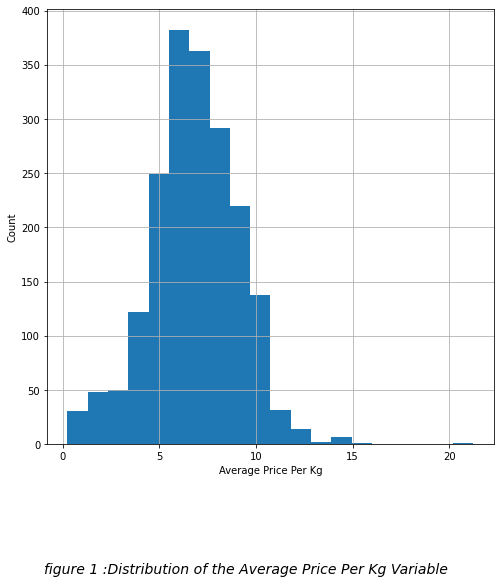

In [11]:
#Plot distribution of average price per kilogram using matplotlib
plt.figure(figsize=(8,8))
plt.hist(df_training_dataset['avg_price_per_kg'],bins=20)
plt.xlabel('Average Price Per Kg')
plt.ylabel('Count')
plt.grid(True)
plt.figtext(0.12, -0.1, 'figure 1 :Distribution of the Average Price Per Kg Variable', horizontalalignment='left',fontsize = 14,style='italic')
plt.show

Taking a look at the histogram, we can see that very few Golden Apples are priced below 2, most of the apples sold between 6 and 7, and very few Golden Apples sold for above 11.

[Also taking a look at the distribution of the Average Price, we can see that:](#dist)  
- Deviate from the normal distribution,
- have appreciable positive skewness and
- show peakedness.

Let's get a body measure for the whole dataset and Average Price Per Kilogram

In [109]:
df_training_dataset.kurtosis()

Weight_Kg            9.109698
Low_Price           17.073369
High_Price          13.630768
Sales_Total         24.200524
Total_Qty_Sold      32.338123
Total_Kg_Sold       45.153801
Stock_On_Hand       14.671224
avg_price_per_kg     1.042921
dtype: float64

All features in the dataset present with great kurtosis (>3 for the normal distribution), indicating that we have a lot of outliers in these features
- Kurtosis is a statistical measure that defines how heavily the tails of a distribution differ from the tails of a normal distribution.
- Kurtosis identifies whether the tailes of a given distribution contain extreme values.

In [111]:
df_training_dataset.skew()

Weight_Kg           3.328254
Low_Price           4.222672
High_Price          3.828819
Sales_Total         4.250317
Total_Qty_Sold      4.445169
Total_Kg_Sold       5.529586
Stock_On_Hand       3.391815
avg_price_per_kg    0.082452
dtype: float64

All features present a very large positive skew.
- Positive skew (or right-skew) distribution is a type of distribution in which most values are clustered around the left tail of the distribution while the right tail of the distribution is longer.

In [107]:
#Skewness and Kurtosis
print("Skewness: %f" % df_training_dataset['avg_price_per_kg'].skew())
print("Kurtosis: %f" % df_training_dataset['avg_price_per_kg'].kurt())


Skewness: 0.082452
Kurtosis: 1.042921


We will only be working with some of the variables — let’s filter and store their names in two lists called `numerical` and `catagorical`, then redefine our `df_training_dataset` DataFrame to contain only these variables:


In [47]:
numeriacal=['Low_Price', 'High_Price', 'Sales_Total', 'Total_Qty_Sold', 'Total_Kg_Sold', 'Stock_On_Hand', 'Weight_Kg']
catagorical=['Province','Container','Size_Grade']

<AxesSubplot:>

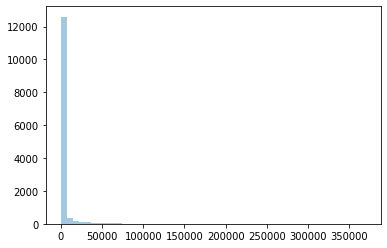

In [98]:
 # creating histograms for our all numerical variables
sns.distplot(df_training_dataset[features],kde=False)
#plt.show()

### Analyzing Categorical Variables


Categorical variables are those for which the values are labeled categories. The values, distribution, and dispersion of categorical variables are best understood with **bar plots**. Let’s analyze the (`Province`) variable. `seaborn` gives us a very simple method to show the counts of observations in each category: the `countplot`.


Text(0.12, -0.1, 'figure 3 :The bars in this plot represent the number of Apples produced for each province')

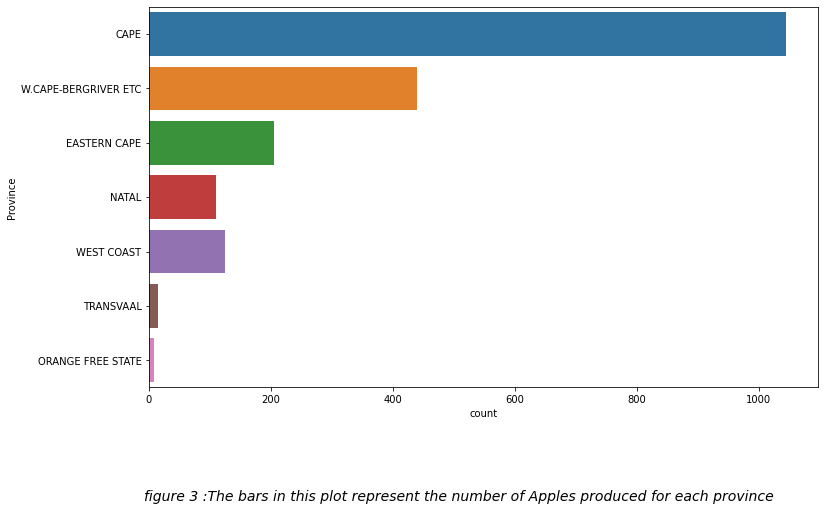

In [32]:
plt.figure(figsize= (12,7))
sns.countplot(y='Province', data=df_training_dataset)
plt.figtext(0.12, -0.1, 'figure 3 :The bars in this plot represent the number of Apples produced for each province', horizontalalignment='left',fontsize = 14,style='italic')


From the visualization, we can easily see that most Golden Delicious Apples were produced in the `CAPE` Province, and very few were produced in `TRANSVAAL` and `ORANGE FREE STATE` provinces.

The reason why Cape provinces produce more Golden Delicious Apple it is because they are the largest traditional apple production region and accounts for more than half of the apple production in the country.The biggest apple production regions are around the Western Cape towns of Ceres, Wolseley, Elgin and Villiersdorp. The Langkloof region is along South Africa’s Southern Cape and spans the border between the Western and the Eastern Cape and produces around 20% of the country’s apples. There are also small but growing production areas further north in the country in the Free State, Mpumalanga and Limpopo Provinces as we can see that Orange Free State has the least of apples production.



Then we iterate over every categorical variable to create a countplot with seaborn:

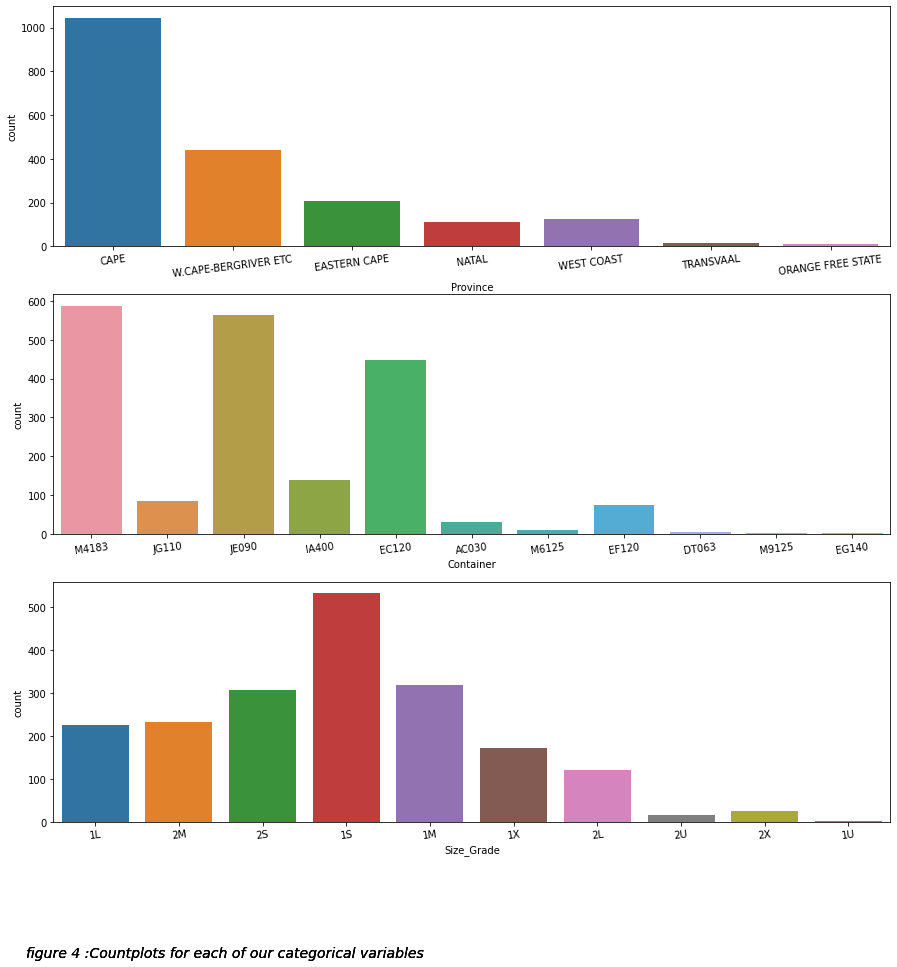

In [113]:
#Countplots for our categorical variables
fig, ax = plt.subplots(3, 1, figsize=(15,15))
for variable, subplot in zip(catagorical, ax.flatten()):
    sns.countplot(df_training_dataset[variable], ax=subplot)
    plt.figtext(0.10, -0.0, 'figure 4 :Countplots for each of our categorical variables', horizontalalignment='left',fontsize = 14,style='italic')
    for label in subplot.get_xticklabels():
        label.set_rotation(7)


As with our numerical variable histograms, we can gather lots of information from this visual-As previously seen that lots af apples are produced from Cape province and largest container for the apples is M4183 ith the size grade of 1S

### Analyzing Relationships Between Numerical and Categorical Variables


The box-and-whisker plot is commonly used for visualizing relationships between numerical variables and categorical variables, and **complex conditional plots** are used to visualize conditional relationships.


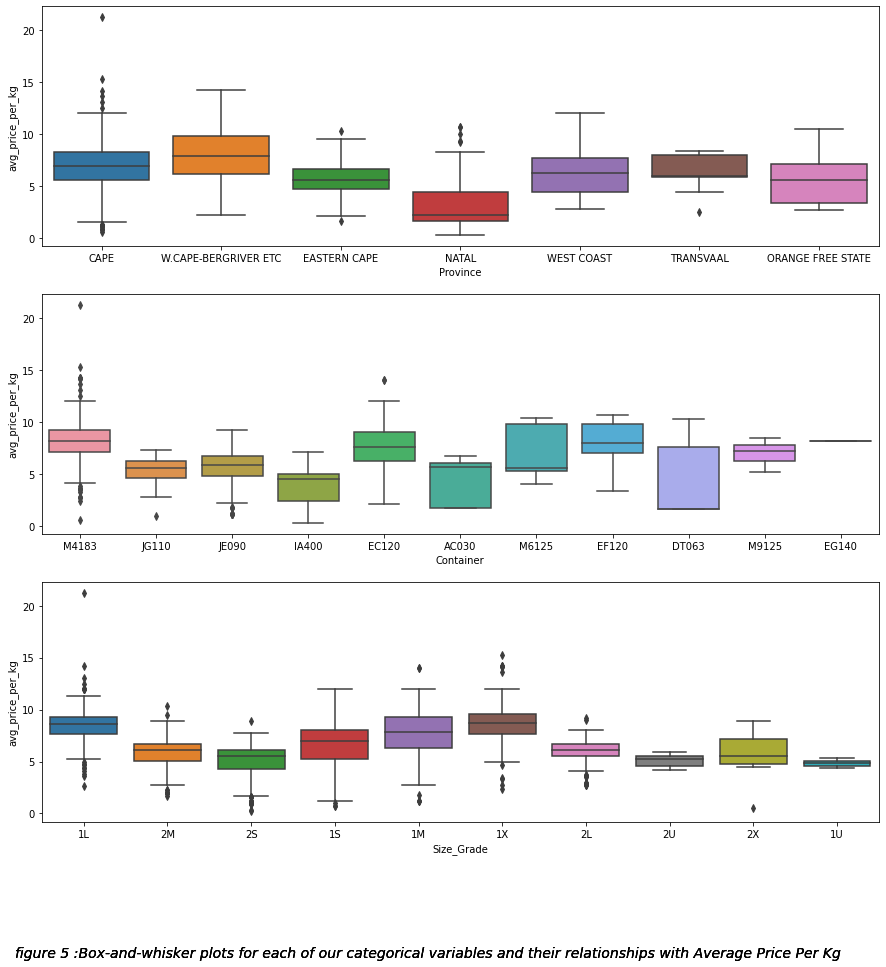

In [112]:
fig, ax = plt.subplots(3, 1, figsize=(15, 15))
for var, subplot in zip(catagorical, ax.flatten()):
    sns.boxplot(x=var, y='avg_price_per_kg', data=df_training_dataset, ax=subplot)
    plt.figtext(0.10, -0.0, 'figure 5 :Box-and-whisker plots for each of our categorical variables and their relationships with Average Price Per Kg', horizontalalignment='left',fontsize = 14,style='italic')


Here, we have iterated through every subplot to produce the visualization between all categorical variables and the avg_price_per_kg.

We can see that Apples produced from W.CAPE-BERGRIVER ETC province classification have a higher average price per kilogram than other province classifications, as do apples with M4183 container, and apples with 1L Size_grade. We can also see that there is significant difference variance in average price per Kilogram between apples with different all three categorical variables.


### Bivariate analysis

**Correlation Analysis** is statistical method that is used to discover if there is a relationship between two variables/ bivariet datasets, and how strong that relationship may be.


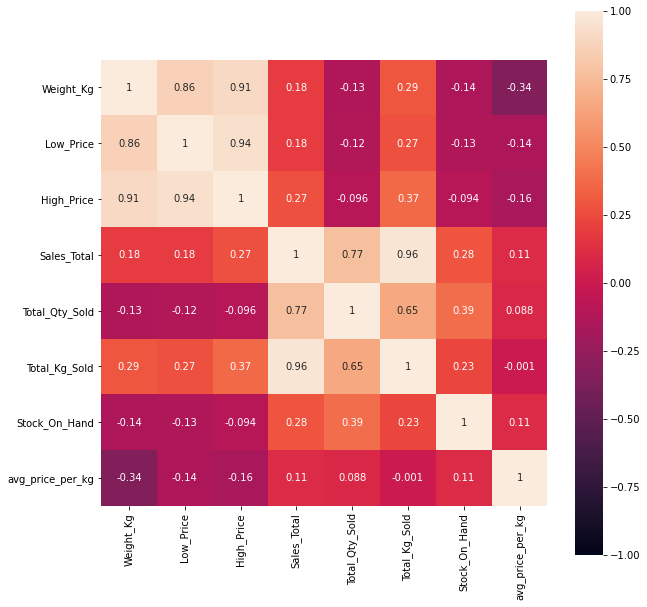

In [106]:
#Heat map for all numerical values in the dataset
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df_training_dataset.corr(), vmin=-1, vmax=1, square=True, annot=True);


Already we can see evidence of multicollinearity between some variables.  We would have to keep a watchful eye on these relationships.  None of the predictors have a relationship (positive or negative) with our response variable.  Perhaps once we deal with the outliers this will change.

Looking at the **Correlation coefficients** whose magnitude are between 0.5 and 0.7 indicate variables which can be considered moderately correlated. **Correlation coefficients** whose magnitude are between 0.3 and 0.5 indicate variables which have a low correlation. values from 0 to 0.25 or from 0 to -0.25 are commonly regarded to indicate the absence of correlation
